## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

In [2]:
# Setting up the environment with required packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

In [3]:
# loading and Reading data
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
print('The number of rows in the dataset is {}'.format(df.shape[0]))

The number of rows in the dataset is 294478


c. The number of unique users in the dataset.

In [5]:
print('The number of unique users is {}'.format(df.user_id.nunique()))

The number of unique users is 290584


d. The proportion of users converted.

In [6]:
print('The proportion of users converted is {}%'.format(round(df.converted.mean()*100,2)))

The proportion of users converted is 11.97%


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
non_align_1 = df.query('group == "treatment" and landing_page != "new_page"')
non_align_2 = df.query('group != "treatment" and landing_page == "new_page"')
non_align = non_align_1.count()[0] + non_align_2.count()[0]
print('{} number of times new_page and treatment do not line up'.format(non_align))

3893 number of times new_page and treatment do not line up


f. Do any of the rows have missing values?

In [8]:
print('There are {} missing values.'.format(df.isnull().any().sum()))

There are 0 missing values.


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  
a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# New dataframe df3 with the rows where new page and treatment do not line up is created.
df3 = pd.concat([non_align_1, non_align_2])
#Since they are errors, they are dropped from the dataframe df2 (duplicate of the df)
df2 = df.drop(df3.index) 

In [10]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
print('Number of unique ids in df2 is {}'.format(df2.user_id.nunique()))

Number of unique ids in df2 is 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.user_id.duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [14]:
#Row info
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# Dropping of duplicates
df2.user_id.drop_duplicates(inplace = True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
print('The probability of an individual converting regardless of the page they received is {}'.format(df2.converted.mean()))

The probability of an individual converting regardless of the page they received is 0.11959667567149027


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control_convert_rate = df2.query('group == "control"').converted.mean()
print(' Given that an individual was in the control group, what is the probability they converted is {}'.
      format(control_convert_rate))

 Given that an individual was in the control group, what is the probability they converted is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
treatment_convert_rate= df2.query('group == "treatment"').converted.mean()
print(' Given that an individual was in the treatment group, what is the probability they converted is {}'.
      format(treatment_convert_rate))

 Given that an individual was in the treatment group, what is the probability they converted is 0.11880724790277405


d. What is the probability that an individual received the new page?

In [19]:
p_new_page= df2.query('landing_page == "new_page"').count()[0]/df2.count()[0]
print('The probability that an individual received the new page is {}'.format(p_new_page))

The probability that an individual received the new page is 0.5000636646764286


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

***ANSWER.***

**From the above two portions, **

**The probabilty of the control group converting is around 12%  and the probability of treatment group converting is 11%. Since the user landing on any page is 0.50, it can be assumed both the pages had almost the same number of users. Looking at the evidence, control group has a better converting rate by a small margin. **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**$H_{0}$**: **$p_{old}$** - **$p_{new}$** >= 0,

**$H_{1}$**: **$p_{old}$** - **$p_{new}$** < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2['converted'].mean()
p_old

0.11959667567149027

c. What is $n_{new}$?

In [22]:
n_new = len(df2.query("group == 'treatment'"))
n_new

145311

d. What is $n_{old}$?

In [23]:
n_old = len(df2.query("group == 'control'"))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
#new_page_converted

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
#old_page_converted

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
#old_page_converted and new_page_converted has different lengths, therefore I turncated to amek it equal
new_page_converted = new_page_converted[:145274]

In [27]:
# difference
diffs = new_page_converted/n_new - old_page_converted/n_old

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [28]:
# Simulating 10000 results
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diffs = new_page_converted - old_page_converted
    p_diffs.append(diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

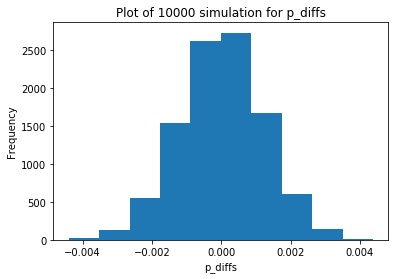

In [29]:
plt.hist(p_diffs);
plt.title('Plot of 10000 simulation for p_diffs');
plt.xlabel('p_diffs');
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
obs_diffs = treatment_convert_rate - control_convert_rate
p_val = (obs_diffs < p_diffs).mean()
print('The p value is {}'.format(p_val))

The p value is 0.908


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

***Answer***

***We have computed the p value. It is the probability of observing our statistic (or one more extreme in favor of the alternative) if the null hypothesis is true. Since the p value is greater than 0.05, we can suggest that the null hypothesis is true as old and new pages perform similarly. As the data shows, the old pages have a better converting rate.***

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print('The z_score is {} and the p value is {}.'.format(z_score,p_value))

The z_score is 1.3116075339133115 and the p value is 0.905173705140591.


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**
**Yes, I agree with the findings in parts j. and k. as p value is the same.
**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**ANSWER.**

***We can use logistic regression here.***

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept']=1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
import statsmodels.api as sm
log_regression =sm.Logit(df2['converted'], df2[['intercept','treatment']])
output = log_regression.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Apr 2018   Pseudo R-squ.:               8.085e-06
Time:                        18:36:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer.**

The p value here is 0.190

**$H_{0}$**: **$p_{old}$** = **$p_{new}$** 

**$H_{1}$**: **$p_{old}$** ≠ **$p_{new}$**

The null hypotheses is the same, but the alternative in Part II states new page is better than old page. But here, it states new page and old page are not equal so p value changes.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

**It would be a good idea to add other factors to our model, as they might affect our conversion rate.**

**Factors like age of the user, has the user has used a similar site before?, products the site sells could be seasonal (like winter clothes). There are several other factors could affect the conversion rate.**

** There are a few disadvantages  adding  factors like some of the factors might not affect the regression at all. **

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [45]:
countries = pd.read_csv('countries.csv')
countries.sample(5)
#merging countries and df2 
combined_df = countries.merge(df2, left_on = 'user_id', right_on = 'user_id', how = 'inner')
# Creating dummy variables
combined_df[['UK', 'CA']] = pd.get_dummies(combined_df['country'])[['UK','CA']]
combined_df.sample(5)

,user_id,country,timestamp,group,landing_page,converted,intercept,control,treatment,UK,CA
103734,752839,US,2017-01-06 04:02:26.370004,treatment,new_page,0,1,0,1,0,0
93275,841769,US,2017-01-17 23:32:25.262846,control,old_page,0,1,1,0,0,0
284717,695919,UK,2017-01-08 17:43:37.329348,treatment,new_page,1,1,0,1,1,0
119096,722941,UK,2017-01-08 06:55:49.421381,treatment,new_page,0,1,0,1,1,0
219263,857798,US,2017-01-05 13:34:03.949702,control,old_page,0,1,1,0,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
log_regression = sm.Logit(combined_df['converted'], combined_df[['UK', 'CA']])
output = log_regression.fit()
output.summary()

Optimization terminated successfully.
         Current function value: 0.595341
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Apr 2018   Pseudo R-squ.:                 -0.6261
Time:                        20:41:20   Log-Likelihood:            -1.7300e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
UK            -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

In [53]:
np.exp(output.params)

UK    0.137132
CA    0.130350
dtype: float64

## Conclusions
**After analyzing the data, it is found that the old page has a slightly better conversion rate than the new page.**

**Therefore we fail to reject the Null Hypothesis (and Reject the Alternate Hypothesis).** 

**The conclusion could change if addition factors were provided to us.**

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0